In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [3]:
df= pd.read_csv("/content/eCommerce.csv")
df.head()

,Unnamed: 0,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,Laptop & Accessory,2.0,Single,9.0,1,11.0,1.0,1.0,5.0,159.93
1,1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,...,Mobile,3.0,Single,7.0,1,15.0,0.0,1.0,0.0,120.90
2,2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,...,Mobile,3.0,Single,6.0,1,14.0,0.0,1.0,3.0,120.28
3,3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,...,Laptop & Accessory,5.0,Single,8.0,0,23.0,0.0,1.0,3.0,134.07
4,4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,...,Mobile,5.0,Single,3.0,0,11.0,1.0,1.0,3.0,129.60


In [5]:
df.describe()

,Unnamed: 0,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,2814.500000,52815.500000,0.168384,10.118117,1.654707,15.534813,2.934636,3.695471,3.066785,4.207993,0.284902,15.671670,1.440409,2.520604,4.429130,175.324229
std,1625.385339,1625.385339,0.374240,8.291334,0.915389,8.089328,0.703826,0.942015,1.380194,2.555111,0.451408,3.582823,1.071295,1.711109,3.439184,44.069817
min,0.000000,50001.000000,0.000000,0.000000,1.000000,5.000000,0.500000,1.500000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,69.836250
25%,1407.250000,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,2814.500000,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,4221.750000,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,5629.000000,55630.000000,1.000000,33.000000,3.000000,36.500000,4.500000,5.500000,5.000000,12.000000,1.000000,25.500000,3.500000,6.000000,14.500000,272.326250


In [6]:
df.dtypes

Unnamed: 0                       int64
CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered       float64
PreferedOrderCat                object
SatisfactionScore              float64
MaritalStatus                   object
NumberOfAddress                float64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0                     0
CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [8]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].str.replace('Cash on Delivery','COD')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].str.replace('Credit Card','CC')

In [9]:
df['PreferredPaymentMode'].unique()



array(['Debit Card', 'UPI', 'CC', 'COD', 'E wallet'], dtype=object)

In [10]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].str.replace('Mobile Phone','Phone')

In [11]:
df['PreferredLoginDevice'].unique()

array(['Phone', 'Computer'], dtype=object)

In [12]:
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice','Gender','PreferedOrderCat','MaritalStatus','CityTier']
num_cols = ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','OrderAmountHikeFromlastYear',
           'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

<Axes: xlabel='PreferredLoginDevice', ylabel='count'>

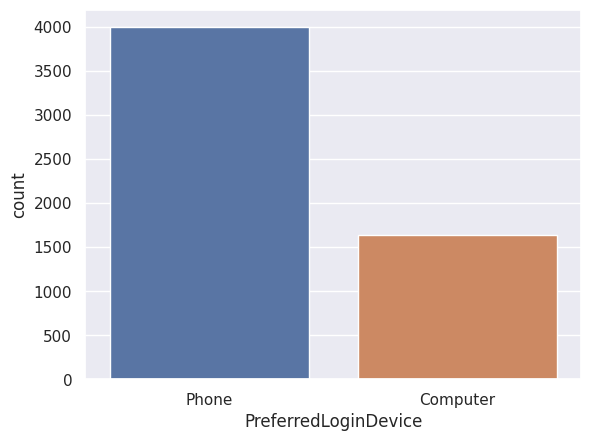

In [13]:
sns.countplot(x="PreferredLoginDevice",data=df)


<Axes: xlabel='Churn', ylabel='count'>

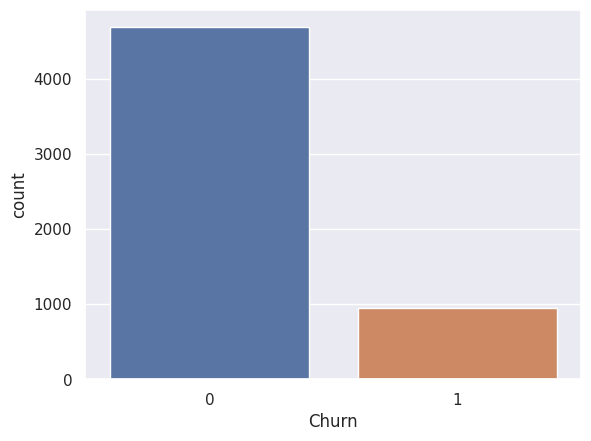

In [14]:
sns.countplot(x="Churn",data=df)


<Axes: xlabel='MaritalStatus', ylabel='count'>

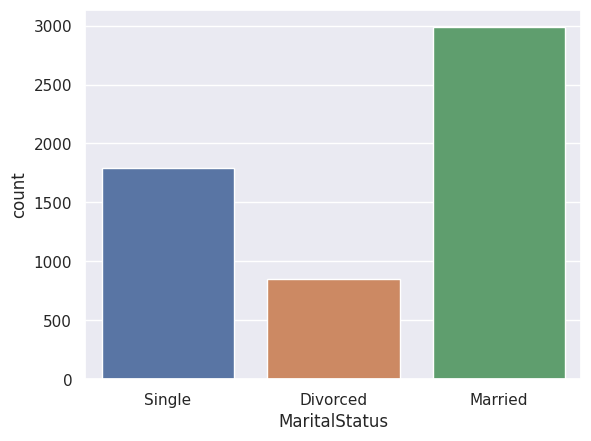

In [15]:
sns.countplot(x="MaritalStatus",data=df)
#has 3 categories

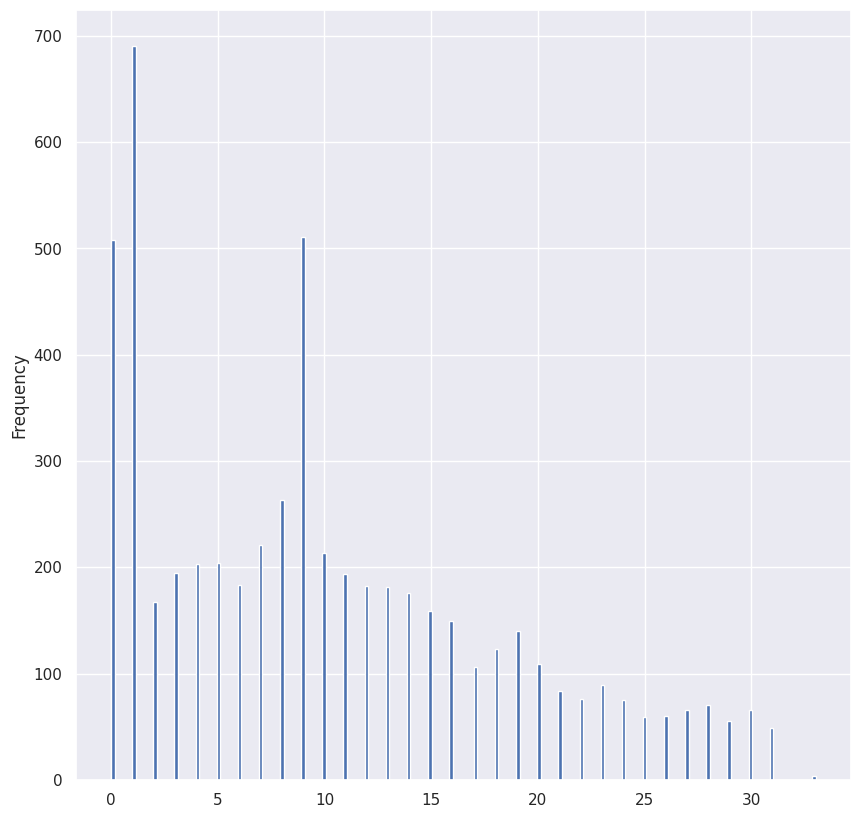

In [16]:
df.Tenure.plot(kind = 'hist', bins = 200, figsize = (10,10))
plt.show()

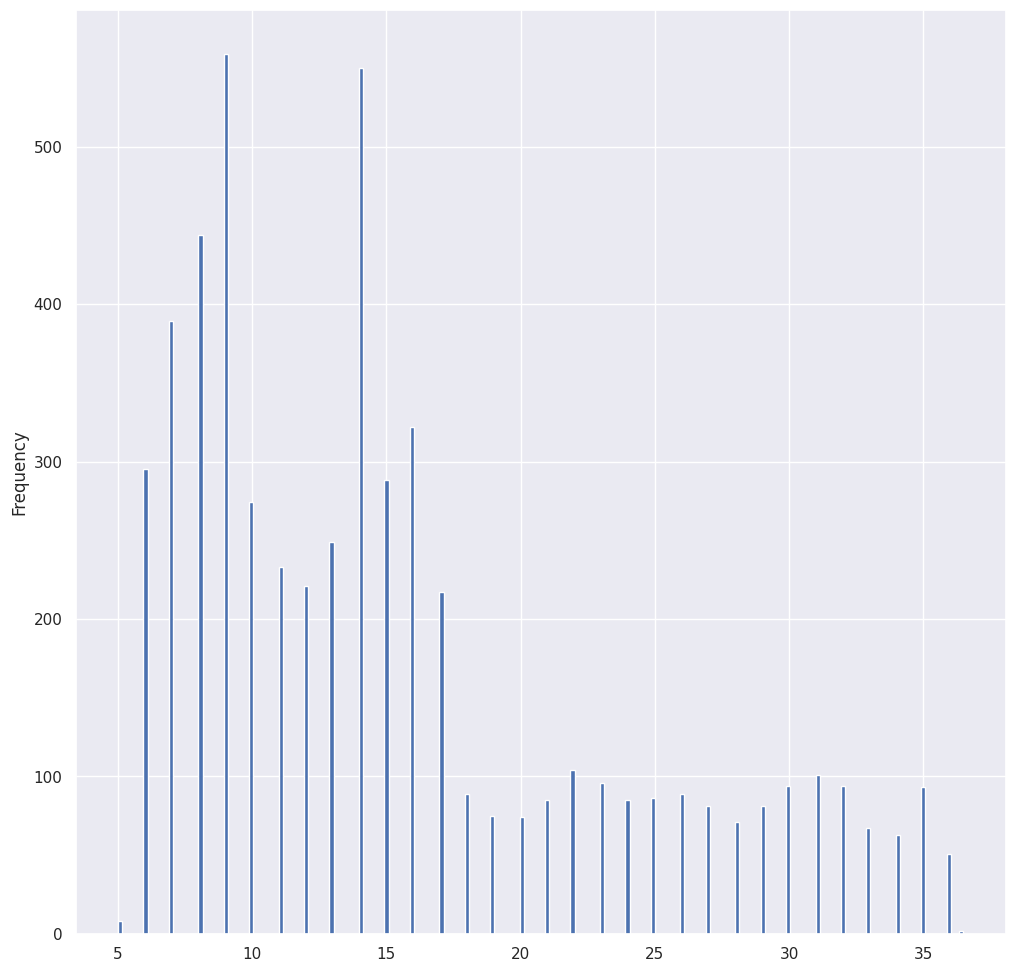

In [17]:
df.WarehouseToHome.plot(kind = 'hist', bins = 200, figsize = (12,12))
plt.show()


<Axes: xlabel='Tenure', ylabel='count'>

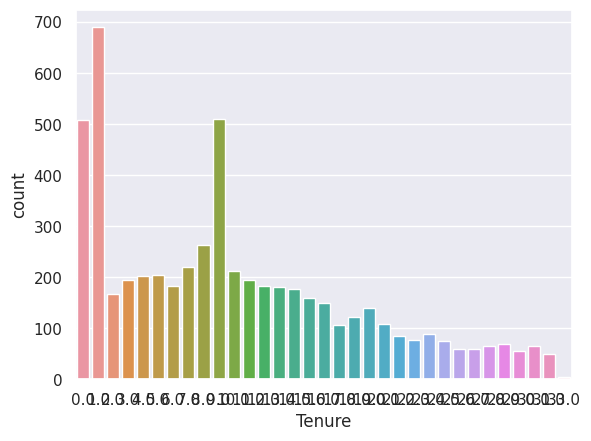

In [18]:

sns.countplot(x="Tenure",data=df)

<ipython-input-19-540974f7d593>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm')


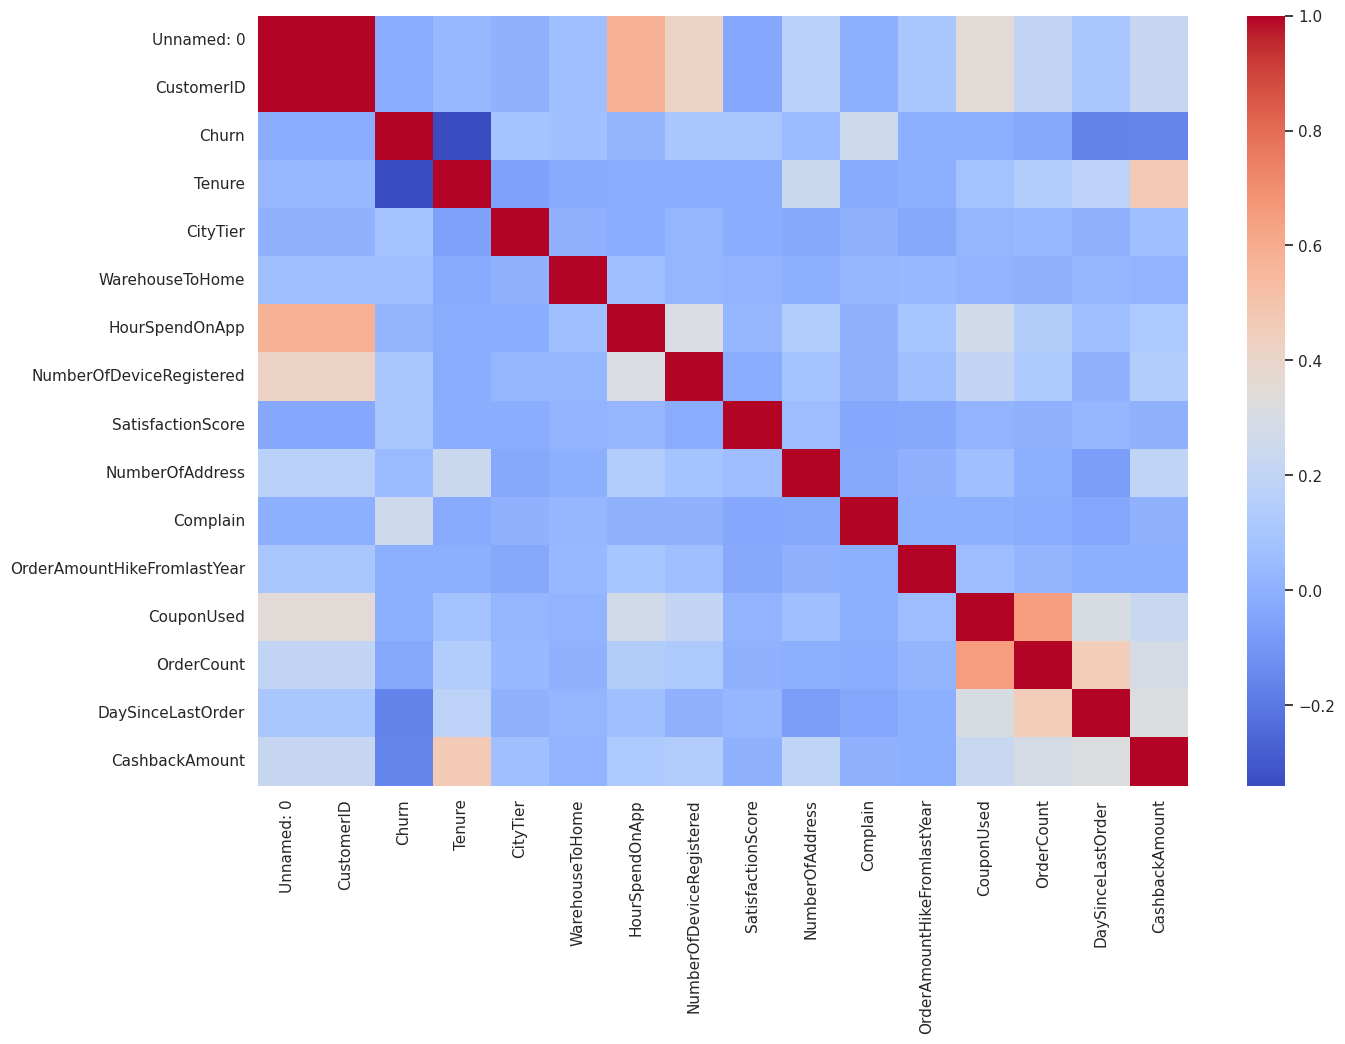

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

In [20]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [21]:
df.isnull().sum()


Unnamed: 0                     0
CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [22]:
def remove_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)

    df[col]=np.where(df[col]>ur,ur,df[col])
    df[col]=np.where(df[col]<lr,lr,df[col])

    return df

for c in num_cols:
    df = remove_outlier(df, c)

In [23]:
df = df.replace(' ', '_', regex=True)
df = df.replace('&', 'And', regex=True)

In [24]:
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.columns

Index(['Unnamed: 0', 'CustomerID', 'Churn', 'Tenure', 'CityTier',
       'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Debit_Card',
       'PreferredPaymentMode_E_wallet', 'PreferredPaymentMode_UPI',
       'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop_And_Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile_Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [25]:
X = df_encoded[['Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Debit_Card',
       'PreferredPaymentMode_E_wallet', 'PreferredPaymentMode_UPI',
       'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop_And_Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile_Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Married', 'MaritalStatus_Single']].copy()
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state=42)


In [26]:
norm = MinMaxScaler().fit(X_train)


X_train_norm = norm.transform(X_train)


X_test_norm = norm.transform(X_test)

In [27]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

print(type(rfc))
scores = cross_val_score(rfc,X_train,y_train,cv=5, scoring='roc_auc')
print ("CV score :",scores.mean())
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(classification_report(y_test, pred))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score : 0.9771197092776628
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       941
           1       0.99      0.85      0.92       185

    accuracy                           0.98      1126
   macro avg       0.98      0.93      0.95      1126
weighted avg       0.98      0.98      0.97      1126

